In [ ]:
!pip install -q datasets torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00


In [ ]:
!pip install -U datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("Falah/Alzheimer_MRI")
train_data = dataset["train"]
test_data = dataset["test"]

print("Train:", len(train_data), "| Test:", len(test_data))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

(…)-00000-of-00001-c08a401c53fe5312.parquet:   0%|          | 0.00/22.6M [00:00<?, ?B/s]

(…)-00000-of-00001-44110b9df98c5585.parquet:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Train: 5120 | Test: 1280


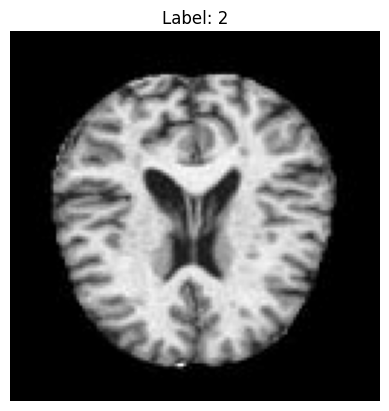

(128, 128)
(128, 128)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


sample = train_data[0]
img = sample["image"]
plt.imshow(img, cmap='gray')  # Force matplotlib to render the image in grayscale
plt.title(f"Label: {sample['label']}")
plt.axis('off')
plt.show()

print(img.size)  # This will show the size of the image (width, height)
print(np.array(img).shape)  # This will show the shape of the image as an array



In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms



class AlzheimerDataset(Dataset):
    def __init__(self, hf_data, transform=None):
        self.data = hf_data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]['image'].convert('RGB')
        if self.transform:
            img = self.transform(img)
        label = self.data[idx]['label']
        return img, label

# 5. Image Transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# 6. Datasets and Dataloaders
train_dataset = AlzheimerDataset(train_data, transform=transform)
test_dataset = AlzheimerDataset(test_data, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 7. Define CNN Model
class AlzheimerCNN(nn.Module):
    def __init__(self):
        super(AlzheimerCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 8. Setup Device and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlzheimerCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 9. Training Loop
for epoch in range(10):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# 10. Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch 1, Loss: 0.9816
Epoch 2, Loss: 0.7097
Epoch 3, Loss: 0.3805
Epoch 4, Loss: 0.1670
Epoch 5, Loss: 0.0562
Epoch 6, Loss: 0.0318
Epoch 7, Loss: 0.0308
Epoch 8, Loss: 0.0065
Epoch 9, Loss: 0.0019
Epoch 10, Loss: 0.0008
Test Accuracy: 98.12%


In [ ]:
torch.save(model.state_dict(), "alzheimer_cnn.pth")


In [ ]:
model.load_state_dict(torch.load("alzheimer_cnn.pth"))
model.eval()


AlzheimerCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [ ]:
def predict_image(image_path, model, transform, device):
    img = Image.open(image_path).convert("RGB")
    img = transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(img)
        _, predicted = torch.max(outputs, 1)

    classes = ["Mild Demented", "Moderate Demented", "Non Demented", "Very Mild Demented"]
    return classes[predicted.item()]


In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])


In [ ]:
# 1. Install Gradio
!pip install -q gradio

# 2. Import Libraries
import gradio as gr
import matplotlib.pyplot as plt

# 3. Save one sample image from test_data
sample_image = test_data[0]['image']
sample_image_path = "example_sample_image.jpg"
sample_image.save(sample_image_path)

# 4. Prediction function
def classify_image_gradio(img):
    img = transform(img).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(img)
        _, predicted = torch.max(outputs, 1)
    classes = ["Mild Demented", "Moderate Demented", "Non Demented", "Very Mild Demented"]
    return {label: float(prob) for label, prob in zip(classes, torch.softmax(outputs, dim=1).cpu().numpy()[0])}

# 5. Launch Gradio with example
gr.Interface(
    fn=classify_image_gradio,
    inputs=gr.Image(type="pil", label="Upload Brain MRI"),
    outputs=gr.Label(num_top_classes=4, label="Predicted Class"),
    examples=[[sample_image_path]],
    title="🧠 Alzheimer MRI Classifier",
    description="Upload a brain MRI image or use the example to detect Alzheimer's condition."
).launch(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9d765dbc7da4189b91.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio d

In [ ]:
import torch
import torch.nn as nn
torch.save(model.state_dict(), "model.pth")
from google.colab import files
files.download("model.pth")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Function to display images
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        image, label = dataset[i]
        # Convert the tensor to a numpy array and unnormalize
        image = image.permute(1, 2, 0).numpy()
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f'Label: {label}')  # No .item() needed, label is an integer

    plt.show()

# Display the first 5 images from the test dataset
show_images(test_dataset, num_images=5)


In [ ]:
import os
from PIL import Image

# Function to save an image from the dataset
def save_image(dataset, idx, save_path='sample_image.jpg'):
    image, label = dataset[idx]
    # Convert the tensor to a PIL image
    image = transforms.ToPILImage()(image)
    image.save(save_path)
    print(f"Image saved at {save_path}")

# Save the first image from the test dataset
save_image(test_dataset, 0, 'sample_image.jpg')

# Provide download link for Colab
from google.colab import files
files.download('sample_image.jpg')


In [ ]:
import os
from PIL import Image
from torchvision import transforms

# Function to save an image from the dataset
def save_image(dataset, idx, save_path='sample_image.jpg'):
    image, label = dataset[idx]
    # Convert the tensor to a PIL image
    image = transforms.ToPILImage()(image)
    image.save(save_path)
    print(f"Image saved at {save_path}")

# Save the first 5 images from the test dataset
for i in range(5):
    save_image(test_dataset, i, f'sample_image_{i+1}.jpg')

# Provide download links for Colab
from google.colab import files
for i in range(5):
    files.download(f'sample_image_{i+1}.jpg')


In [ ]:
# For model
from google.colab import files
files.download("model.pth")

# For your main app script
files.download("app.py")

# If you have sample images
files.download("sample_image_1.jpg")
files.download("sample_image_2.jpg")
